In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

def plot_matriz_confusion(axes,TP=0,TN=0,FP=0,FN=0,fontsize=15,precision=None,negative_predictive_value=None,recall_sensitivity=None,specificity=None,accuracy=None,f1_score=None,mcc=None,auc=None):
    success_color=matplotlib.colors.to_rgb('#9EE548')
    failure_color=matplotlib.colors.to_rgb("#C32240")
    blanco_color=matplotlib.colors.to_rgb("#FFFFFF")


    if ((precision is not None) | 
        (negative_predictive_value is not None) | 
        (recall_sensitivity is not None) |
        (specificity is not None) | 
        (accuracy is not None) |
        (f1_score is not None) | 
        (mcc is not None) |
        (auc is not None) ):
        show_metrics=True
    else:
        show_metrics=False


    if show_metrics==False:
        axes.imshow([[success_color,failure_color],[failure_color,success_color]])
    else:
        axes.imshow([[success_color,failure_color,blanco_color],[failure_color,success_color,blanco_color],[blanco_color,blanco_color,blanco_color]])



    labels = ['Positivo','Negativo']
    xaxis = np.arange(len(labels))
    axes.set_xticks(xaxis)
    axes.set_yticks(xaxis)
    axes.set_xticklabels(labels, fontsize=13, color="#003B80")
    axes.set_yticklabels(labels, fontsize=13, color="#003B80")
    axes.text(0, 0, str(TP)+" TP",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.text(0, 1, str(FP)+" FP",ha="center", va="center", color="#FAEAEA",fontsize=fontsize) 
    axes.text(1, 0, str(FN)+" FN",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 1, str(TN)+" TN",ha="center", va="center", color="#0A2102",fontsize=fontsize)         
    axes.xaxis.tick_top()
    axes.set_xlabel('Predicción', fontsize=fontsize, color="#003B80") 
    axes.xaxis.set_label_position('top') 
    axes.set_ylabel('Realidad', fontsize=fontsize, color="#003B80") 


    if show_metrics==True:


        if (precision is not None):
            axes.text(0, 2, f"Precision\n{precision:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (negative_predictive_value is not None):
            axes.text(1, 2, f"VPN\n{negative_predictive_value:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (recall_sensitivity is not None):
            axes.text(2, 0, f"Sensibilidad\n{recall_sensitivity:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 
        if (specificity is not None):
            axes.text(2, 1, f"Especificidad\n{specificity:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 

        metricas_generales=""
        if (accuracy is not None):
            metricas_generales=metricas_generales+f"Exactitud\n{accuracy:.2f}\n"
        if (f1_score is not None):
            metricas_generales=metricas_generales+f"F1-score\n{f1_score:.2f}\n"   
        if (mcc is not None):
            metricas_generales=metricas_generales+f"MCC\n{mcc:.2f}\n"  
        if (auc is not None):
            metricas_generales=metricas_generales+f"AUC\n{auc:.2f}"             

        axes.text(2, 2, metricas_generales,ha="center", va="center", color="#0A2102",fontsize=fontsize-4)          



    


Verdaderos Positivos= 8
Verdaderos Negativos= 4
Falsos Positivos= 3
Falsos Negativos= 5


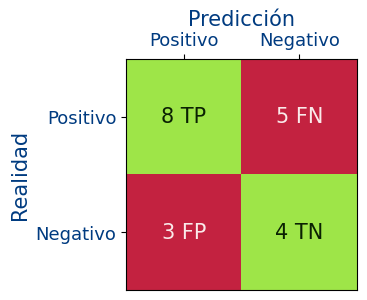

In [2]:
#Ejercicio 1
print("Verdaderos Positivos=",8)
print("Verdaderos Negativos=",4)
print("Falsos Positivos=",3)
print("Falsos Negativos=",5)


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=8,TN=4,FP=3,FN=5)




In [3]:
#Ejercicio 2.A
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5

print(y_pred)

[False False  True  True False False False False  True  True  True False
 False]


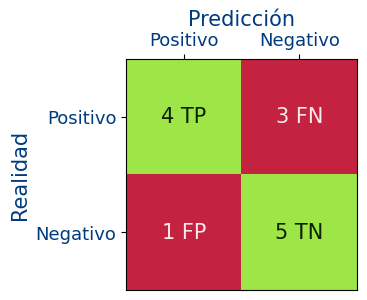

In [4]:
#Ejercicio 2.B

y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5


TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN)


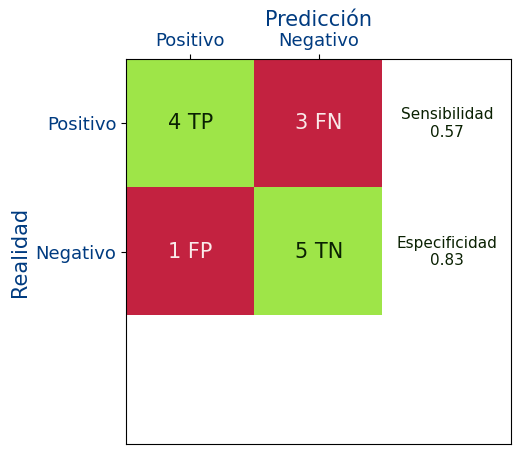

In [5]:
#Ejercicio 2.C


y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5

TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))

recall_sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)

figure=plt.figure(figsize=(5, 5)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,
        recall_sensitivity=recall_sensitivity,
        specificity=specificity)

In [6]:
#Rutinas comunes

import numpy as np
import pandas as pd
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from time import perf_counter
from sklearn.preprocessing import LabelBinarizer
import random
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import tensorflow_addons as tfa
import sklearn


def plot_metrics(axes,history,title,metric,label):

 
      axes.plot(history[metric],linestyle="dotted",c="#003B80")  
      axes.plot(history[f'val_{metric}'],linestyle="solid",label=f"{label} validación:{history[f'val_{metric}'][-1]:.2f}",c="#003B80")

      axes.set_xlabel('Nº Épocas', fontsize=13,color="#003B80")
      axes.xaxis.set_major_locator(MaxNLocator(integer=True))

      axes.set_ylabel(label, fontsize=13,color="#003B80")
      axes.set_ylim(ymin=0,ymax=1.1)
      axes.yaxis.set_major_locator(MultipleLocator(0.1))

      axes.set_title(title)
      axes.set_facecolor("#F0F7FF")
      axes.grid(visible=True, which='major', axis='both',color="#FFFFFF",linewidth=2)
      axes.legend()

def compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train, x_test, y_train, y_test,metrics=[]):

    input_dim=x_train.shape[1]

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)
   
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation=last_activation))          
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    model.compile(loss=loss,optimizer=optimizer,metrics=metrics)
   
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,verbose=False)

    return history,model

def get_datos():
  datos=load_breast_cancer()
  x=datos.data
  y=datos.target

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

  return x_train, x_test, y_train, y_test    








/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [7]:
#Ejercicio 3.A

def get_metrics(y_true,y_score,threshold=0.5):

    y_pred=y_score>threshold

    TP=sum((y_true==1) & (y_pred==1))
    TN=sum((y_true==0) & (y_pred==0))
    FP=sum((y_true==0) & (y_pred==1))
    FN=sum((y_true==1) & (y_pred==0))



    sensibilidad=TP/(TP+FN)
    especificidad=TN/(TN+FP)
    
    vpp=TP/(TP+FP)
    vpn=TN/(TN+FN)

    auc=sklearn.metrics.roc_auc_score(y_true,y_score)

    return TP,TN,FP,FN,sensibilidad,especificidad,vpp,vpn,auc

y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
TP,TN,FP,FN,sensibilidad,especificidad,vpp,vpn,auc=get_metrics(y_true,y_score,threshold=0.5)

print(f"TP={TP},TN={TN},FP={FP},FN={FN}");
print(f"Sensibilidad={sensibilidad:.2f}")
print(f"Especificidad={especificidad:.2f}")
print(f"VPP={vpp:.2f}")
print(f"VPN={vpn:.2f}")
print(f"AUC={auc:.2f}")


TP=4,TN=5,FP=1,FN=3
Sensibilidad=0.57
Especificidad=0.83
VPP=0.80
VPN=0.62
AUC=0.81


2024-03-07 14:44:43.416735: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-03-07 14:44:43.416761: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: beren
2024-03-07 14:44:43.416767: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: beren
2024-03-07 14:44:43.416865: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.161.7
2024-03-07 14:44:43.416881: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.154.5
2024-03-07 14:44:43.416885: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 535.154.5 does not match DSO version 535.161.7 -- cannot find working devices in this configuration
2024-03-07 14:44:43.417218: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDN

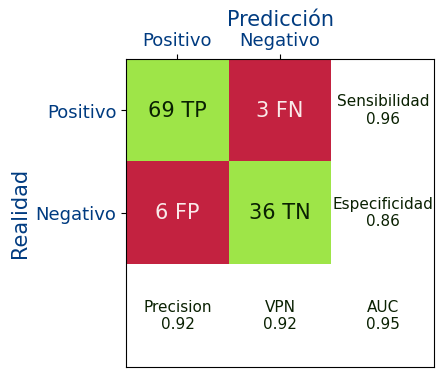

In [8]:
#Ejercicio 3.B

x_train, x_test, y_train, y_test=get_datos()

capas=[30,64,32,16,8,1]
activation="ELU"
epochs=20
learning_rate=0.0001
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)

history,model=compile_fit(capas,activation,"sigmoid","binary_crossentropy",optimizer,epochs,x_train, x_test, y_train, y_test)

y_score=model.predict(x_test).reshape(-1)
y_true=y_test

figure=plt.figure(figsize=(4,4)) 
axes=figure.add_subplot(1,1,1)
TP,TN,FP,FN,sensibilidad,especificidad,vpp,vpn,auc=get_metrics(y_true,y_score,threshold=0.5)

plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,
        recall_sensitivity=sensibilidad,
        specificity=especificidad,              
        precision=vpp,
        negative_predictive_value=vpn,
        auc=auc)

In [9]:
#Ejercicio 3.C
def specificity(y_true, y_score):
    threshold=0.5
    y_pred = tf.cast(tf.greater_equal(y_score, threshold), tf.float32)
 
 
    true_negatives = tf.logical_and(tf.equal(y_true, 0), tf.equal(y_pred, 0))
    num_true_negatives=tf.reduce_sum(tf.cast(true_negatives, tf.float32))
 
 
    negatives =tf.equal(y_true, 0)
    num_negatives= tf.reduce_sum(tf.cast(negatives, tf.float32))
 
 
    specificity = num_true_negatives / (num_negatives + tf.keras.backend.epsilon())
     
    return specificity


x_train, x_test, y_train, y_test=get_datos()

capas=[30,64,32,16,8,1]
activation="ELU"
epochs=20
learning_rate=0.0001
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics=["Recall",specificity,"AUC"]

history,model=compile_fit(capas,activation,"sigmoid","binary_crossentropy",optimizer,epochs,x_train, x_test, y_train, y_test,metrics)




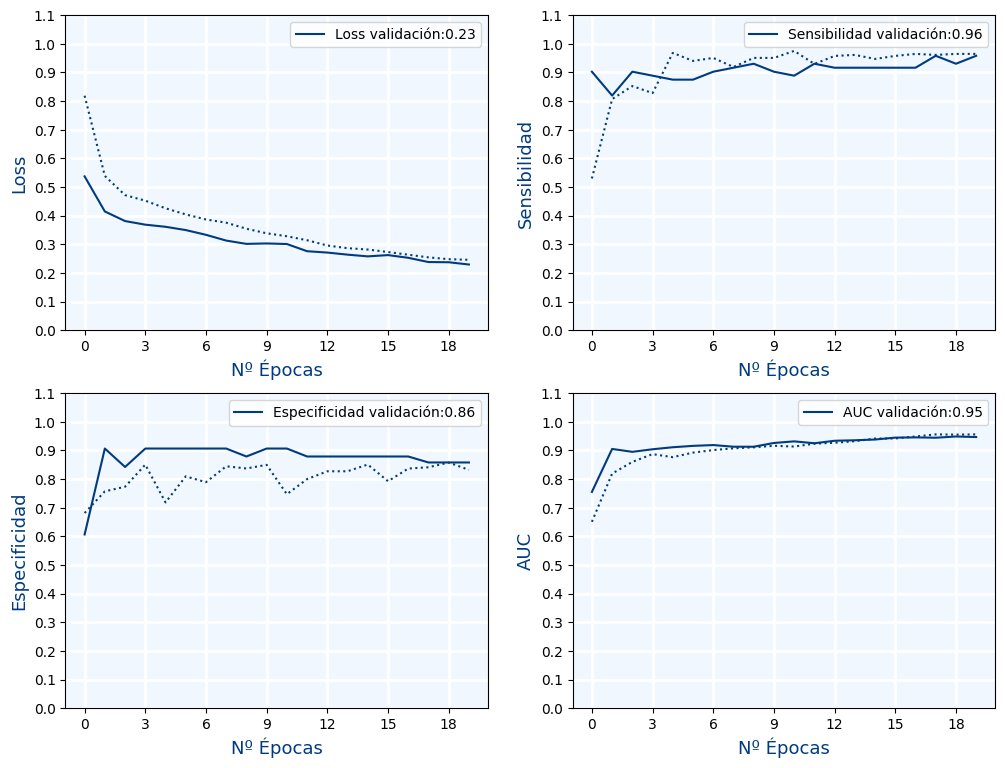

In [13]:
figure=plt.figure(figsize=(12, 9)) 
axes=figure.add_subplot(2,2,1)
plot_metrics(axes,history.history,"","loss","Loss")
axes=figure.add_subplot(2,2,2)
plot_metrics(axes,history.history,"","recall","Sensibilidad")
axes=figure.add_subplot(2,2,3)
plot_metrics(axes,history.history,"","specificity","Especificidad")
axes=figure.add_subplot(2,2,4)
plot_metrics(axes,history.history,"","auc","AUC")